## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [67]:
audio_path = []
audio_label = []
for dirname, _, filenames in os.walk('C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data'):
    for filename in filenames:
        audio_path.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        audio_label.append(label.lower())
    if len(audio_path) == 2800:
        break
print('Dataset has been Loaded')

Dataset has been Loaded


In [68]:
len(audio_path)

2800

In [92]:
audio_path[:5]

['C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\ngiro\\Documents\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [70]:
audio_label[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [71]:
df=pd.DataFrame()
df['speech path']=audio_path
df['emotion label']=audio_label
df.head()

,speech path,emotion label
0,C:\Users\ngiro\Documents\TESS Toronto emotiona...,angry
1,C:\Users\ngiro\Documents\TESS Toronto emotiona...,angry
2,C:\Users\ngiro\Documents\TESS Toronto emotiona...,angry
3,C:\Users\ngiro\Documents\TESS Toronto emotiona...,angry
4,C:\Users\ngiro\Documents\TESS Toronto emotiona...,angry


In [72]:
df['emotion label'].value_counts()


emotion label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## **Exploratory Data Analysis**

In [2]:
import seaborn as sns
sns.countplot(x=df['emotion label'])


NameError: name 'df' is not defined

In [55]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20,)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x=librosa.stft(data)
    x_db= librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20,)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


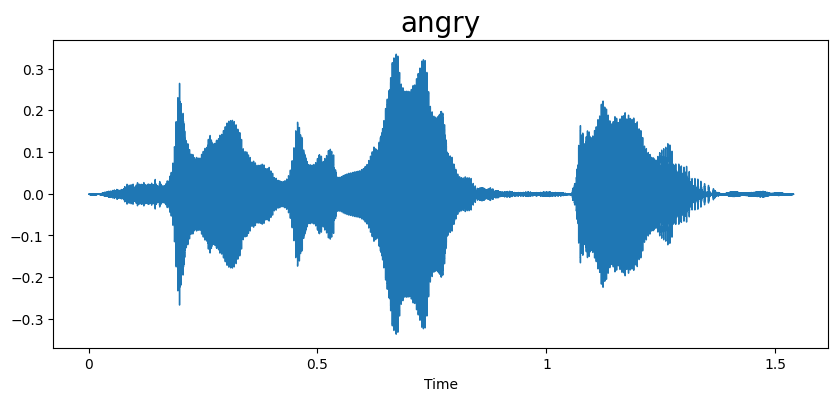

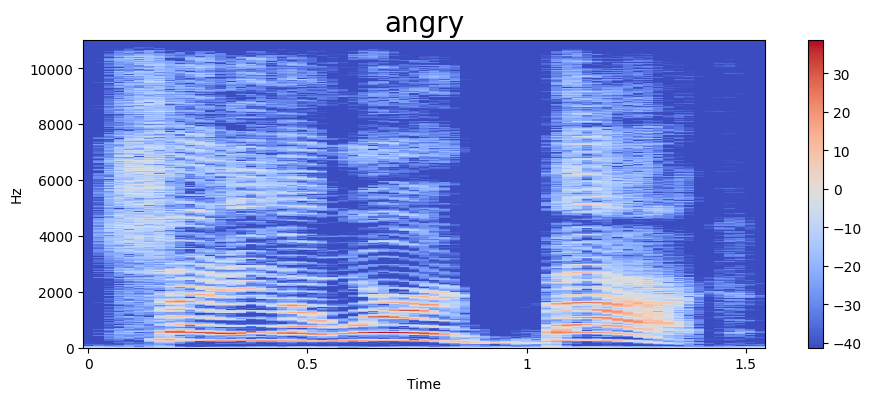

In [52]:
emotion='angry'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

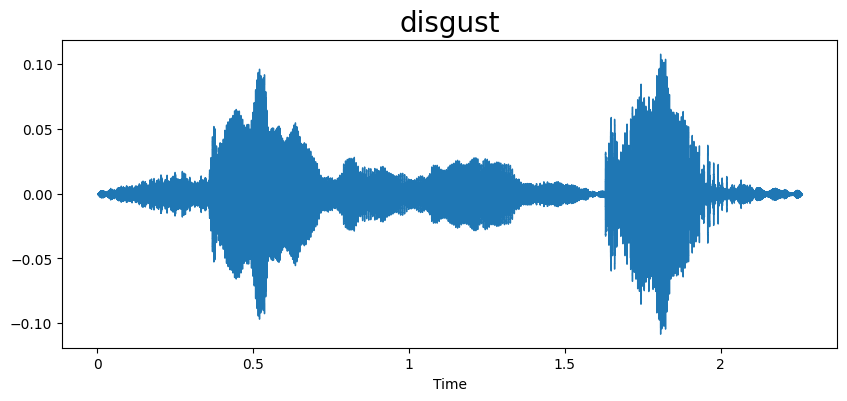

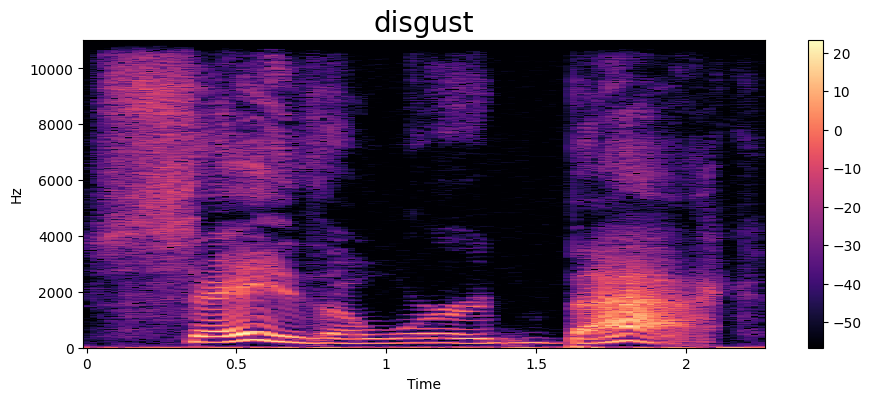

In [53]:
emotion='disgust'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

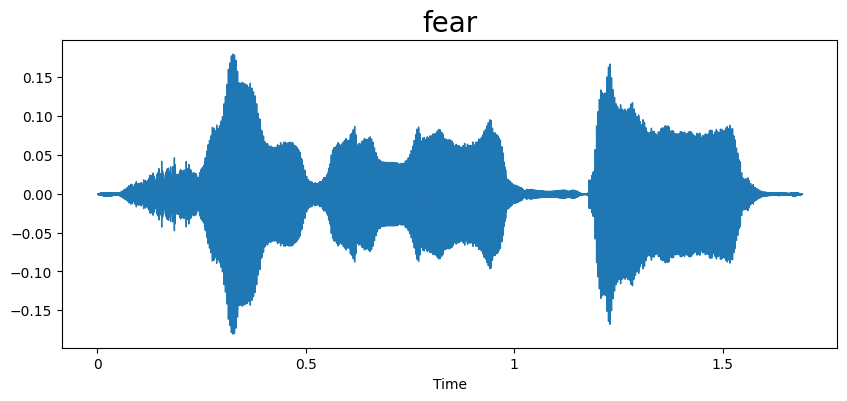

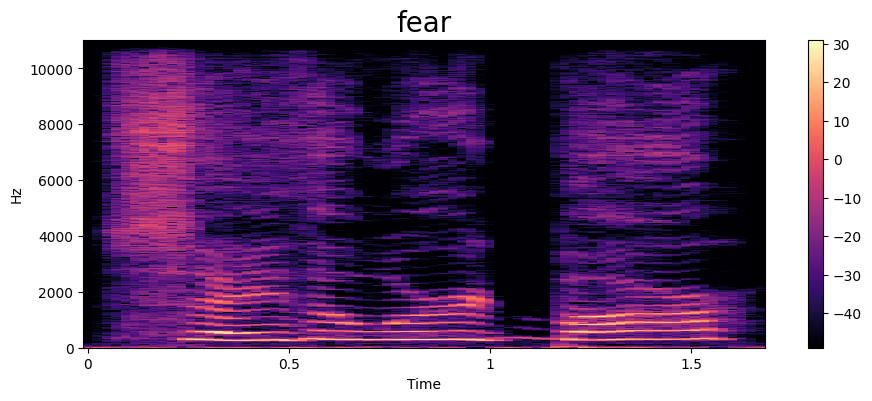

In [54]:
emotion='fear'
path= np.array(df['speech path'][df['emotion label']==emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

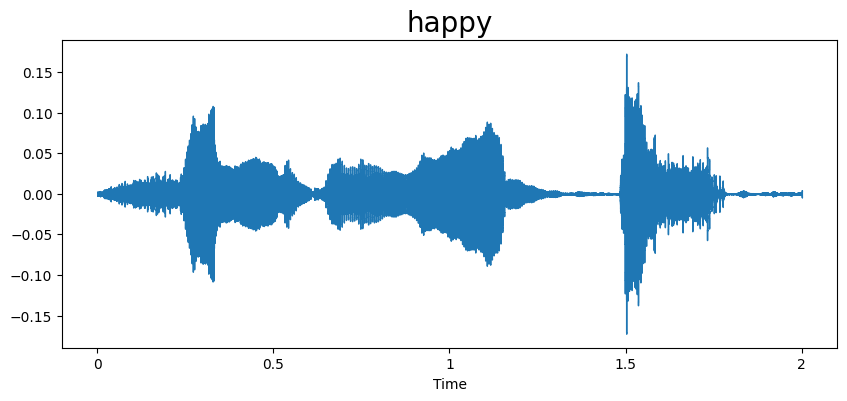

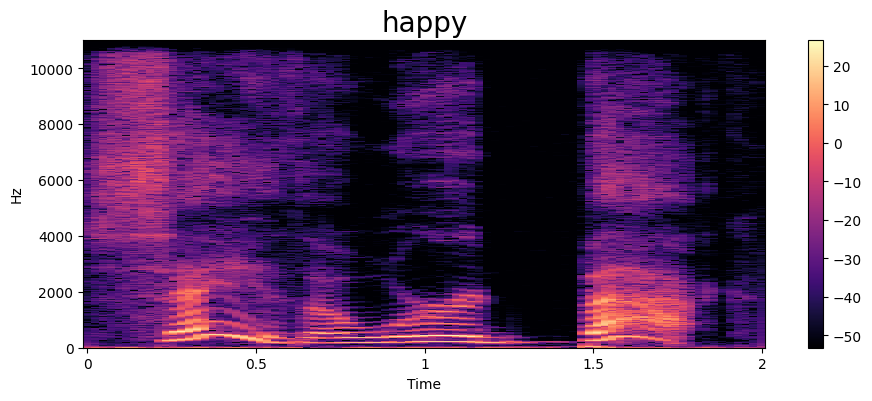

In [89]:
emotion='happy'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

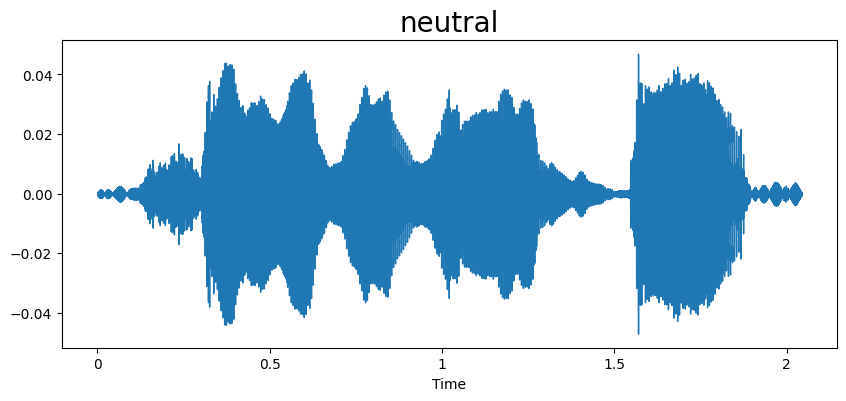

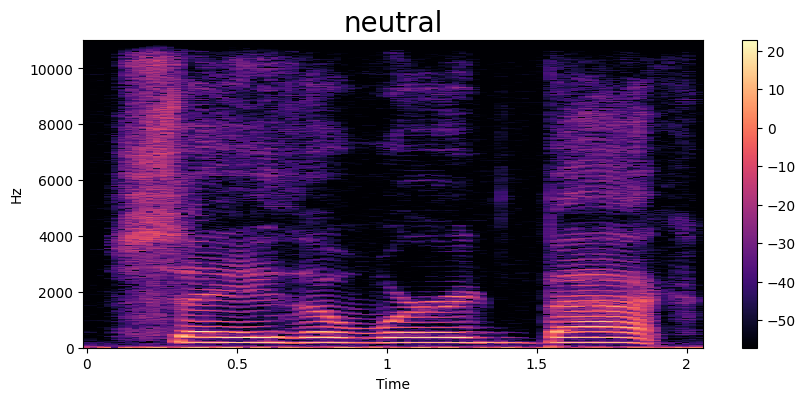

In [40]:
emotion='neutral'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

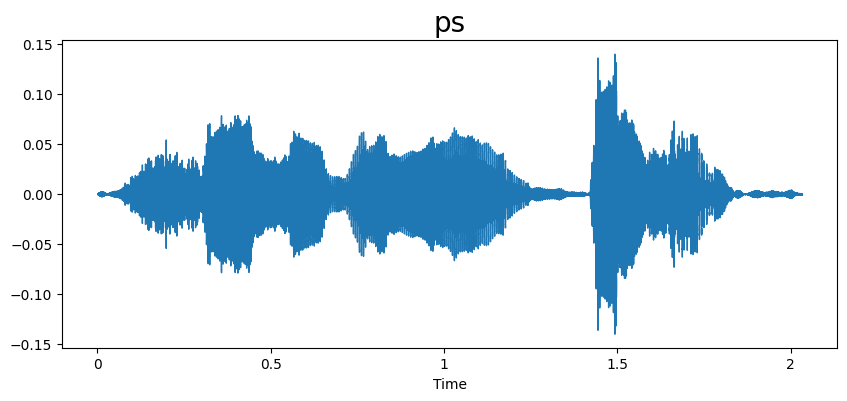

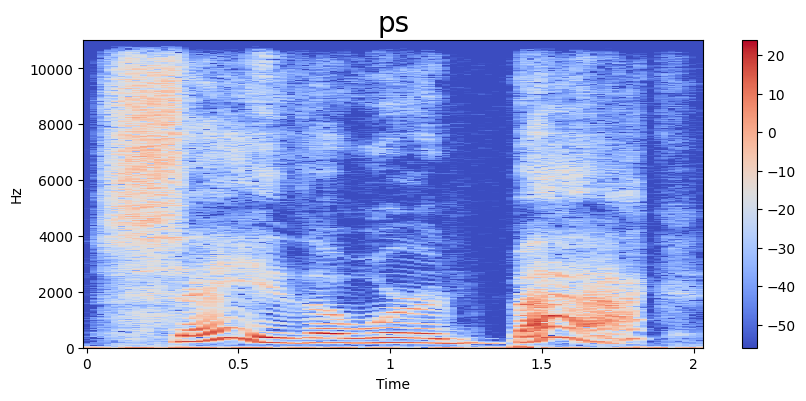

In [47]:
emotion='ps'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

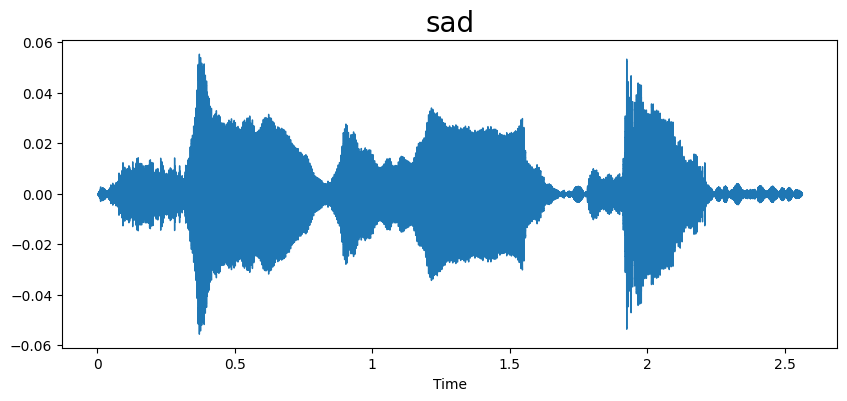

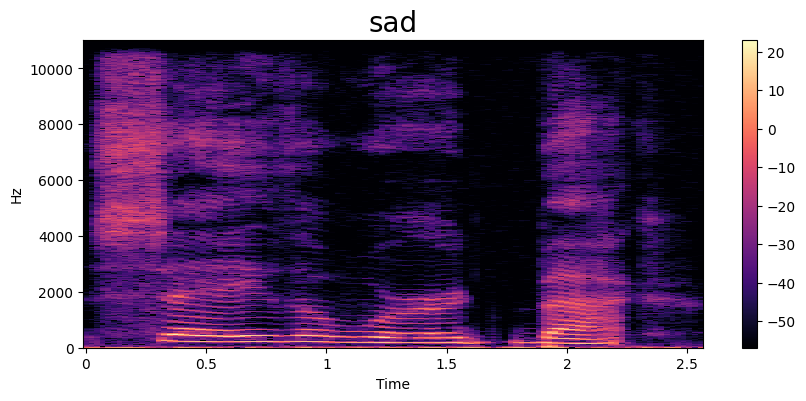

In [52]:
emotion='sad'
path= np.array(df['speech path'][df['emotion label']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## **Feature Extraction**

In [76]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc_feature=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40,).T, axis=0)
    return mfcc_feature

In [77]:
extract_mfcc(df['speech path'][0])  #40 values here 

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275578e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255363e+00,  2.02101767e-01,
        7.27550745e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722819e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649104e+00],
      dtype=float32)

In [78]:
X_mfcc=df['speech path'].apply(lambda x: extract_mfcc(x))

In [3]:
X_mfcc

NameError: name 'X_mfcc' is not defined

In [2]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

NameError: name 'X_mfcc' is not defined

In [81]:
##input split
X=np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['emotion label']]) 

In [83]:
y=y.toarray()

In [27]:
def extract_mel(filename):
 y, sr = librosa.load(filename, duration=3, offset=0.5)
 spect = np.abs(librosa.stft(y, hop_length=512))
 #spect = librosa.amplitude_to_db(spect, ref=np.max)
 mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
 mel_spect = librosa.power_to_db(spect, ref=np.max)
 librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
 plt.title('Mel Spectrogram');
 plt.colorbar(format='%+2.0f dB')
 return mel_spect

array([[-22.354969, -18.658016, -17.996357, ..., -14.931382, -16.987358,
        -19.31843 ],
       [-23.461779, -21.243835, -18.889912, ..., -16.918783, -20.775505,
        -20.772614],
       [-25.773094, -24.980553, -22.572083, ..., -20.624882, -23.377234,
        -25.469828],
       ...,
       [-46.160885, -49.33413 , -80.      , ..., -80.      , -77.79285 ,
        -64.94013 ],
       [-46.167263, -49.341206, -80.      , ..., -80.      , -77.80084 ,
        -64.94233 ],
       [-46.169632, -49.343758, -80.      , ..., -80.      , -77.75893 ,
        -64.93251 ]], dtype=float32)

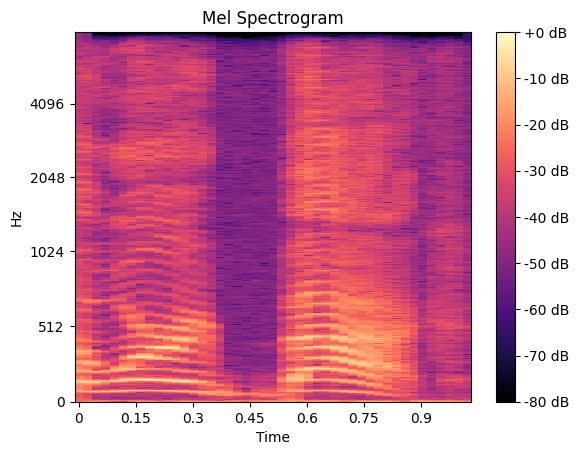

In [85]:
extract_mel(df['speech path'][0])

Create LSTM model

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [83]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [92]:
#train the model
history= model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, shuffle=True)

Epoch 1/50
35/35 [==============================] - 9s 247ms/step - loss: 0.0407 - accuracy: 0.9857 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 2/50
35/35 [==============================] - 9s 266ms/step - loss: 0.0482 - accuracy: 0.9866 - val_loss: 0.0908 - val_accuracy: 0.9768
Epoch 3/50
35/35 [==============================] - 9s 254ms/step - loss: 0.0497 - accuracy: 0.9871 - val_loss: 0.0334 - val_accuracy: 0.9857
Epoch 4/50
35/35 [==============================] - 8s 238ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 4.7136e-04 - val_accuracy: 1.0000
Epoch 5/50
35/35 [==============================] - 8s 226ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.0680 - val_accuracy: 0.9821
Epoch 6/50
35/35 [==============================] - 8s 237ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0056 - val_accuracy: 0.9982
Epoch 7/50
35/35 [==============================] - 8s 234ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 8.6834e-04 - val_accuracy: 1.000

plot the results

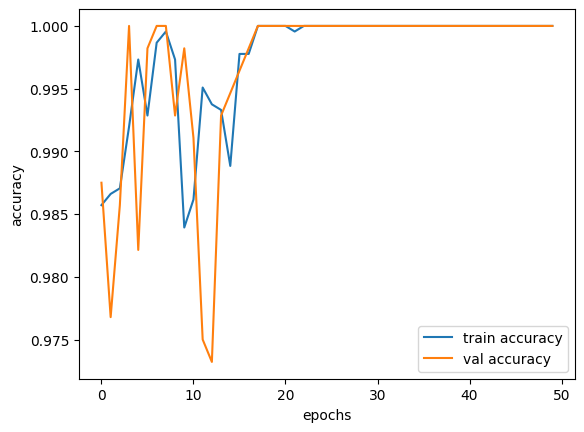

In [93]:
epoch = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()

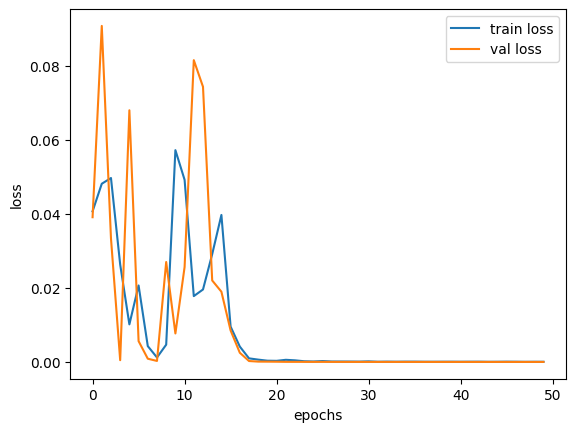

In [94]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [1]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

NameError: name 'X' is not defined

In [ ]:
from sklearn import preprocessing
pred_test = model.predict(X)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))